# Sentiment Analysis on News

## 1. Strings preprocessing

In [ ]:
# filter: https://www.simplilearn.com/tutorials/python-tutorial/filter-in-python
# Annoying things about python:
# - functions return weird object types instead of lists (map, filter...)

def sanitize_filter(char):
  if char.isspace(): return ' '
  if char.isalpha(): return char.lower()
  return ""

string = "LUKE!!11!!1! I am your father..."
sanitized_string = "".join(list(map(sanitize_filter, list(string))))
print(sanitized_string)
tokens = sanitized_string.split()
print(tokens)

luke i am your father
['luke', 'i', 'am', 'your', 'father']


## 2. Pipeline for strings preprocessing 

In [ ]:
def sanitize_string(string):
  return "".join(list(map(sanitize_filter, list(string))))

def tokenize(string):
  return string.split()

def preprocess_string(string):
  return (tokenize(sanitize_string(string)))

print(sanitize_string(""))
print(tokenize("hello darkness, my old friend"))
print(preprocess_string("THERE 11IS NO SP00OON"))


['hello', 'darkness,', 'my', 'old', 'friend']
['there', 'is', 'no', 'spoon']


## 3. Storing preprocessed strings

In [ ]:
headlines = [
              {
                  "publishdate": 20130504,
                  "headlinetext": "ItA*lys cRypTOCUrREnCy BITgrAil suspeNds OpERatIOnS"
              }
             ]

# destructive method -> is this against the subject?
def process_headlines(headlines):
  for headline in headlines:
    headline["proc_headlinetext"] = preprocess_string(headline["headlinetext"])

process_headlines(headlines)
print(headlines)

[{'publishdate': 20130504, 'headlinetext': 'ItA*lys cRypTOCUrREnCy BITgrAil suspeNds OpERatIOnS', 'proc_headlinetext': ['italys', 'cryptocurrency', 'bitgrail', 'suspends', 'operations']}]


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/crypto_headlines.csv", sep="\t")
df.head()

,publishdate,headlinetext
0,20130504,COnSTELlATIon DaG iS nOW liStEd On kucoiN eXC?...
1,20130511,ItA*lys cRypTOCUrREnCy BITgrAil suspeNds OpERa...
2,20130511,THe diffeRENCe bETWEEn sHarEs aNd cRYpToCUrReN...
3,20130512,fedS seIzE 47 mIlLION In bItCoinS in FAke ID S...
4,20130514,ThE diG sTarteD ASiCboOST neTwORK AnD b@ItcoIN...


In [ ]:
headlines = df.to_dict(orient="records")

In [ ]:
process_headlines(headlines)

In [ ]:
# Can't print everything or I get this:
# IOPub data rate exceeded.
# The notebook server will temporarily stop sending output
# to the client in order to avoid crashing it.
# To change this limit, set the config variable
# `--NotebookApp.iopub_data_rate_limit`.

print(headlines[0:3])

[{'publishdate': 20130504, 'headlinetext': 'COnSTELlATIon DaG iS nOW liStEd On kucoiN eXC?haNGE', 'proc_headlinetext': ['constellation', 'dag', 'is', 'now', 'listed', 'on', 'kucoin', 'exchange']}, {'publishdate': 20130511, 'headlinetext': 'ItA*lys cRypTOCUrREnCy BITgrAil suspeNds OpERatIOnS', 'proc_headlinetext': ['italys', 'cryptocurrency', 'bitgrail', 'suspends', 'operations']}, {'publishdate': 20130511, 'headlinetext': 'THe diffeRENCe bETWEEn sHarEs aNd cRYpToCUrReN€CiES', 'proc_headlinetext': ['the', 'difference', 'between', 'shares', 'and', 'cryptocurrencies']}]


## 4. Scoring and storing headlines sentiment 

In [ ]:
import json

with open('/content/drive/MyDrive/Colab Notebooks/words_sentiment.json') as json_file:
    words_sentiment = json.load(json_file)
words_sentiment

{'aback': {'anger': 0,
  'anticipation': 0,
  'disgust': 0,
  'fear': 0,
  'joy': 0,
  'negative': 0,
  'positive': 0,
  'sadness': 0,
  'surprise': 0,
  'trust': 0},
 'abacus': {'anger': 0,
  'anticipation': 0,
  'disgust': 0,
  'fear': 0,
  'joy': 0,
  'negative': 0,
  'positive': 0,
  'sadness': 0,
  'surprise': 0,
  'trust': 1},
 'abandon': {'anger': 0,
  'anticipation': 0,
  'disgust': 0,
  'fear': 1,
  'joy': 0,
  'negative': 1,
  'positive': 0,
  'sadness': 1,
  'surprise': 0,
  'trust': 0},
 'abandoned': {'anger': 1,
  'anticipation': 0,
  'disgust': 0,
  'fear': 1,
  'joy': 0,
  'negative': 1,
  'positive': 0,
  'sadness': 1,
  'surprise': 0,
  'trust': 0},
 'abandonment': {'anger': 1,
  'anticipation': 0,
  'disgust': 0,
  'fear': 1,
  'joy': 0,
  'negative': 1,
  'positive': 0,
  'sadness': 1,
  'surprise': 1,
  'trust': 0},
 'abate': {'anger': 0,
  'anticipation': 0,
  'disgust': 0,
  'fear': 0,
  'joy': 0,
  'negative': 0,
  'positive': 0,
  'sadness': 0,
  'surprise': 0,


In [ ]:
def get_sentiment(tokens, words_sentiment):
  sentiment = {"anger": 0, "anticipation": 0, "disgust": 0, "fear": 0, "joy": 0, "negative": 0, "positive": 0, "sadness": 0, "surprise": 0, "trust": 0}
  for token in tokens:
    if token in words_sentiment.keys():
      for key, value in words_sentiment[token].items():
        sentiment[key] += value
  return sentiment

negative_tokens = ["im", "mad", "as", "hell"]
mad = get_sentiment(negative_tokens, words_sentiment)
mad

{'anger': 2,
 'anticipation': 0,
 'disgust': 2,
 'fear': 2,
 'joy': 0,
 'negative': 2,
 'positive': 0,
 'sadness': 2,
 'surprise': 0,
 'trust': 0}

In [ ]:
def analyse_sentiment_headlines(headlines):
  for headline in headlines:
    headline["sentiment"] = get_sentiment(headline["proc_headlinetext"], words_sentiment)

analyse_sentiment_headlines(headlines)
headlines[0:3]

[{'headlinetext': 'COnSTELlATIon DaG iS nOW liStEd On kucoiN eXC?haNGE',
  'proc_headlinetext': ['constellation',
   'dag',
   'is',
   'now',
   'listed',
   'on',
   'kucoin',
   'exchange'],
  'publishdate': 20130504,
  'sentiment': {'anger': 0,
   'anticipation': 0,
   'disgust': 0,
   'fear': 0,
   'joy': 0,
   'negative': 0,
   'positive': 1,
   'sadness': 0,
   'surprise': 0,
   'trust': 1}},
 {'headlinetext': 'ItA*lys cRypTOCUrREnCy BITgrAil suspeNds OpERatIOnS',
  'proc_headlinetext': ['italys',
   'cryptocurrency',
   'bitgrail',
   'suspends',
   'operations'],
  'publishdate': 20130511,
  'sentiment': {'anger': 0,
   'anticipation': 0,
   'disgust': 0,
   'fear': 0,
   'joy': 0,
   'negative': 0,
   'positive': 0,
   'sadness': 0,
   'surprise': 0,
   'trust': 0}},
 {'headlinetext': 'THe diffeRENCe bETWEEn sHarEs aNd cRYpToCUrReN€CiES',
  'proc_headlinetext': ['the',
   'difference',
   'between',
   'shares',
   'and',
   'cryptocurrencies'],
  'publishdate': 20130511,
  '

## 5. Analysing the headlines sentiment 

In [ ]:
def get_total_sentiment(headlines, words_sentiment):
  sentiment = {"anger": 0, "anticipation": 0, "disgust": 0, "fear": 0, "joy": 0, "negative": 0, "positive": 0, "sadness": 0, "surprise": 0, "trust": 0}
  for headline in headlines:
    for key, value in headline['sentiment'].items():
        sentiment[key] += value
  return sentiment

news_sentiment = get_total_sentiment(headlines, words_sentiment)
news_sentiment

{'anger': 34125,
 'anticipation': 62199,
 'disgust': 11086,
 'fear': 43246,
 'joy': 28428,
 'negative': 62230,
 'positive': 119671,
 'sadness': 21983,
 'surprise': 21583,
 'trust': 84457}

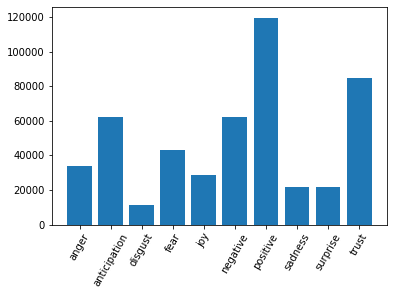

In [83]:
import matplotlib.pyplot as plt

names = list(news_sentiment.keys())
values = list(news_sentiment.values())
plt.bar(range(len(news_sentiment)), values, tick_label=names)
plt.xticks(rotation=60)
plt.show()

In [86]:
nb_news = len(headlines)
news_sentiment_percentage = {}
for key, value in news_sentiment.items():
  news_sentiment_percentage[key] = round(value / nb_news * 100, 2)
news_sentiment_percentage

{'anger': 17.89,
 'anticipation': 32.61,
 'disgust': 5.81,
 'fear': 22.68,
 'joy': 14.91,
 'negative': 32.63,
 'positive': 62.75,
 'sadness': 11.53,
 'surprise': 11.32,
 'trust': 44.29}